In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os, sys
import itertools
sys.path.append("../bin")


In [2]:
#get the edges for the hypercube for N=4
levels=[]
for k in [1,2,3,4]:
    levels.append([set(x) for x in (itertools.combinations(range(1,5),k))])
j=2
state_ids=dict()
for level in levels:
    for x in level:
        state_ids["_".join(list(map(str,x)))]=j
        j+=1
print(state_ids)
edges=[]
for i in range(2,6):
    edges.append(("1","%s"%i,"a_1_%s"%i))
    edges.append(("%s"%i,"1","b_1_%s"%i))

for j in range(4):
    if j==0:
        states0=set()
    else:
        states0=levels[j-1]
    states1=levels[j]
    #print(states0,states1)
    for state0 in states0:
        for state1 in states1:
            if state0.issubset(state1):
                str0="_".join(list(map(str,state0)))
                str1="_".join(list(map(str,state1)))
                origin=state_ids[str0]
                target=state_ids[str1]
                print(state0,state1, origin, target)
                edges.append((str(origin),str(target),"a_%s_%s"%(origin,target)))
                edges.append((str(target),str(origin),"b_%s_%s"%(origin,target)))
edges


{'1': 2, '2': 3, '3': 4, '4': 5, '1_2': 6, '1_3': 7, '1_4': 8, '2_3': 9, '2_4': 10, '3_4': 11, '1_2_3': 12, '1_2_4': 13, '1_3_4': 14, '2_3_4': 15, '1_2_3_4': 16}
{1} {1, 2} 2 6
{1} {1, 3} 2 7
{1} {1, 4} 2 8
{2} {1, 2} 3 6
{2} {2, 3} 3 9
{2} {2, 4} 3 10
{3} {1, 3} 4 7
{3} {2, 3} 4 9
{3} {3, 4} 4 11
{4} {1, 4} 5 8
{4} {2, 4} 5 10
{4} {3, 4} 5 11
{1, 2} {1, 2, 3} 6 12
{1, 2} {1, 2, 4} 6 13
{1, 3} {1, 2, 3} 7 12
{1, 3} {1, 3, 4} 7 14
{1, 4} {1, 2, 4} 8 13
{1, 4} {1, 3, 4} 8 14
{2, 3} {1, 2, 3} 9 12
{2, 3} {2, 3, 4} 9 15
{2, 4} {1, 2, 4} 10 13
{2, 4} {2, 3, 4} 10 15
{3, 4} {1, 3, 4} 11 14
{3, 4} {2, 3, 4} 11 15
{1, 2, 3} {1, 2, 3, 4} 12 16
{1, 2, 4} {1, 2, 3, 4} 13 16
{1, 3, 4} {1, 2, 3, 4} 14 16
{2, 3, 4} {1, 2, 3, 4} 15 16


[('1', '2', 'a_1_2'),
 ('2', '1', 'b_1_2'),
 ('1', '3', 'a_1_3'),
 ('3', '1', 'b_1_3'),
 ('1', '4', 'a_1_4'),
 ('4', '1', 'b_1_4'),
 ('1', '5', 'a_1_5'),
 ('5', '1', 'b_1_5'),
 ('2', '6', 'a_2_6'),
 ('6', '2', 'b_2_6'),
 ('2', '7', 'a_2_7'),
 ('7', '2', 'b_2_7'),
 ('2', '8', 'a_2_8'),
 ('8', '2', 'b_2_8'),
 ('3', '6', 'a_3_6'),
 ('6', '3', 'b_3_6'),
 ('3', '9', 'a_3_9'),
 ('9', '3', 'b_3_9'),
 ('3', '10', 'a_3_10'),
 ('10', '3', 'b_3_10'),
 ('4', '7', 'a_4_7'),
 ('7', '4', 'b_4_7'),
 ('4', '9', 'a_4_9'),
 ('9', '4', 'b_4_9'),
 ('4', '11', 'a_4_11'),
 ('11', '4', 'b_4_11'),
 ('5', '8', 'a_5_8'),
 ('8', '5', 'b_5_8'),
 ('5', '10', 'a_5_10'),
 ('10', '5', 'b_5_10'),
 ('5', '11', 'a_5_11'),
 ('11', '5', 'b_5_11'),
 ('6', '12', 'a_6_12'),
 ('12', '6', 'b_6_12'),
 ('6', '13', 'a_6_13'),
 ('13', '6', 'b_6_13'),
 ('7', '12', 'a_7_12'),
 ('12', '7', 'b_7_12'),
 ('7', '14', 'a_7_14'),
 ('14', '7', 'b_7_14'),
 ('8', '13', 'a_8_13'),
 ('13', '8', 'b_8_13'),
 ('8', '14', 'a_8_14'),
 ('14', '8', 'b_

The list 'edges' contains tuples where the first element is the source node index, the second element is the target node index, and the third element is the label name. The label name starts with a if it is a binding rate, and with b if it is an unbinding rate. If it is a binding rate, the format is a_source_target, whereas if it is an unbinding rate, the format is b_target_source. The node with nothing bound has index 1.

In [3]:
#print for cpp code
i=0
for edge in edges:
    print("InternalType", edge[-1], "= pars[%d];"%i)
    i+=1

InternalType a_1_2 = pars[0];
InternalType b_1_2 = pars[1];
InternalType a_1_3 = pars[2];
InternalType b_1_3 = pars[3];
InternalType a_1_4 = pars[4];
InternalType b_1_4 = pars[5];
InternalType a_1_5 = pars[6];
InternalType b_1_5 = pars[7];
InternalType a_2_6 = pars[8];
InternalType b_2_6 = pars[9];
InternalType a_2_7 = pars[10];
InternalType b_2_7 = pars[11];
InternalType a_2_8 = pars[12];
InternalType b_2_8 = pars[13];
InternalType a_3_6 = pars[14];
InternalType b_3_6 = pars[15];
InternalType a_3_9 = pars[16];
InternalType b_3_9 = pars[17];
InternalType a_3_10 = pars[18];
InternalType b_3_10 = pars[19];
InternalType a_4_7 = pars[20];
InternalType b_4_7 = pars[21];
InternalType a_4_9 = pars[22];
InternalType b_4_9 = pars[23];
InternalType a_4_11 = pars[24];
InternalType b_4_11 = pars[25];
InternalType a_5_8 = pars[26];
InternalType b_5_8 = pars[27];
InternalType a_5_10 = pars[28];
InternalType b_5_10 = pars[29];
InternalType a_5_11 = pars[30];
InternalType b_5_11 = pars[31];
InternalTy

In [4]:
#print laplacian for cpp code
L=np.zeros((16,16),dtype="object")


for edge in edges:
    origin,target,label=edge
    if "a" in label:
        label=label+"*x"
    L[int(target)-1,int(origin)-1]=label
for row in L:
    print(",".join(list(map(str,row))),end=",\n")

0,b_1_2,b_1_3,b_1_4,b_1_5,0,0,0,0,0,0,0,0,0,0,0,
a_1_2*x,0,0,0,0,b_2_6,b_2_7,b_2_8,0,0,0,0,0,0,0,0,
a_1_3*x,0,0,0,0,b_3_6,0,0,b_3_9,b_3_10,0,0,0,0,0,0,
a_1_4*x,0,0,0,0,0,b_4_7,0,b_4_9,0,b_4_11,0,0,0,0,0,
a_1_5*x,0,0,0,0,0,0,b_5_8,0,b_5_10,b_5_11,0,0,0,0,0,
0,a_2_6*x,a_3_6*x,0,0,0,0,0,0,0,0,b_6_12,b_6_13,0,0,0,
0,a_2_7*x,0,a_4_7*x,0,0,0,0,0,0,0,b_7_12,0,b_7_14,0,0,
0,a_2_8*x,0,0,a_5_8*x,0,0,0,0,0,0,0,b_8_13,b_8_14,0,0,
0,0,a_3_9*x,a_4_9*x,0,0,0,0,0,0,0,b_9_12,0,0,b_9_15,0,
0,0,a_3_10*x,0,a_5_10*x,0,0,0,0,0,0,0,b_10_13,0,b_10_15,0,
0,0,0,a_4_11*x,a_5_11*x,0,0,0,0,0,0,0,0,b_11_14,b_11_15,0,
0,0,0,0,0,a_6_12*x,a_7_12*x,0,a_9_12*x,0,0,0,0,0,0,b_12_16,
0,0,0,0,0,a_6_13*x,0,a_8_13*x,0,a_10_13*x,0,0,0,0,0,b_13_16,
0,0,0,0,0,0,a_7_14*x,a_8_14*x,0,0,a_11_14*x,0,0,0,0,b_14_16,
0,0,0,0,0,0,0,0,a_9_15*x,a_10_15*x,a_11_15*x,0,0,0,0,b_15_16,
0,0,0,0,0,0,0,0,0,0,0,a_12_16*x,a_13_16*x,a_14_16*x,a_15_16*x,0,


Now use what has been printed above to make a .cpp file with the code to solve for the laplacian nullspace using the svd given an input value for x.

I created 2 files: one with 100 digit precision, and another with 25 digit precision (faster but less accurate).

Once the file is created, compile as follows:

In [5]:
path_to_eigen="/Users/rosamartinezcorral/Documents/eigenlibrary/eigen-eigen-323c052e1731/" #for backward compatibility, no longer required


In [6]:
fname="../bin/N4av_noneq_100.cpp"
path_1,file=os.path.split(fname)
objectnamemac=os.path.join(path_1,file.replace('.cpp','')) 

compilestringmac="c++ -O2 -DNDEBUG -Wall -shared -std=c++11  -fPIC -undefined dynamic_lookup -lmpfr -lmpc -I %s  `python3 -m pybind11 --includes` %s -o %s`python3-config --extension-suffix`"%(path_to_eigen,fname,objectnamemac)

compilestring=compilestringmac
print(compilestring)

!$compilestring

c++ -O2 -DNDEBUG -Wall -shared -std=c++11  -fPIC -undefined dynamic_lookup -lmpfr -lmpc -I /Users/rosamartinezcorral/Documents/eigenlibrary/eigen-eigen-323c052e1731/  `python3 -m pybind11 --includes` ../bin/N4av_noneq_100.cpp -o ../bin/N4av_noneq_100`python3-config --extension-suffix`


In [7]:
fname="../bin/N4av_noneq_25.cpp"
path_1,file=os.path.split(fname)
objectnamemac=os.path.join(path_1,file.replace('.cpp','')) 

compilestringmac="c++ -O2 -DNDEBUG -Wall -shared -std=c++11  -fPIC -undefined dynamic_lookup -lmpfr -lmpc -I %s  `python3 -m pybind11 --includes` %s -o %s`python3-config --extension-suffix`"%(path_to_eigen,fname,objectnamemac)

compilestring=compilestringmac
print(compilestring)

!$compilestring

c++ -O2 -DNDEBUG -Wall -shared -std=c++11  -fPIC -undefined dynamic_lookup -lmpfr -lmpc -I /Users/rosamartinezcorral/Documents/eigenlibrary/eigen-eigen-323c052e1731/  `python3 -m pybind11 --includes` ../bin/N4av_noneq_25.cpp -o ../bin/N4av_noneq_25`python3-config --extension-suffix`


Then the code can be imported:

In [6]:
import N4av_noneq_100
import N4av #this is the equilibrium version of the code, used to doublecheck that the code works. Results should be the same when the rates for the non-eq model satisfy cycle condition.

In order to doublecheck the code, convert equilibrium parameters (affinities and cooperativities) into the corresponding rates, by setting the backward rates to 1.

In [7]:
#way to convert the equilibrium parameters into the on-rate label values so I can doublecheck new code with code previously used using the mus and mtt
def fill_dict(pars):
    K1=pars[0];
    K2=pars[1];
    K3=pars[2];
    K4=pars[3];
    w12=pars[4];
    w13=pars[5];
    w14=pars[6];
    w23=pars[7];
    w24=pars[8];
    w34=pars[9];
    w123=pars[10];
    w124=pars[11];
    w134=pars[12];
    w234=pars[13];
    w1234=pars[14];
    

    w312=w123*w23/w12
    w412=w124*w24/w12
    w213=w123*w23/w13
    w413=w134*w34/w13
    w214=w24*w124/w14
    w314=w134*w34/w14
    w423=w234*w34/w23
    w324=w234*w34/w24

    w4123=w1234*w234*w34/(w23*w123)
    w3124=w1234*w234*w34/(w24*w124)
    w2134=w1234*w234*w34/(w34*w134)

    d=dict()
    d["a_1_2"]=K1
    d["a_1_3"]=K2
    d["a_1_4"]=K3
    d["a_1_5"]=K4
    d["a_2_6"]=K2*w12
    d["a_2_7"]=K3*w13
    d["a_2_8"]=K4*w14
    d["a_3_6"]=K1*w12
    d["a_3_9"]=K3*w23
    d["a_3_10"]=K4*w24
    d["a_4_7"]=K1*w13
    d["a_4_9"]=K2*w23
    d["a_4_11"]=K4*w34
    d["a_5_8"]=K1*w14
    d["a_5_10"]=K2*w24
    d["a_5_11"]=K3*w34
    d["a_6_12"]=K3*w312
    d["a_6_13"]=K4*w412
    d["a_7_12"]=K2*w213
    d["a_7_14"]=K4*w413
    d["a_8_13"]=K2*w214
    d["a_8_14"]=K3*w314
    d["a_9_12"]=K1*w123
    d["a_9_15"]=K4*w423
    d["a_10_15"]=K3*w324
    d["a_10_13"]=K1*w124
    d["a_11_14"]=K1*w134
    d["a_11_15"]=K2*w234
    d["a_12_16"]=K4*w4123
    d["a_13_16"]=K3*w3124
    d["a_14_16"]=K2*w2134
    d["a_15_16"]=K1*w1234
    return d

def get_pars_forcpp(labeldict):
    pars_forcpp=np.zeros(64)
    for e,edge in enumerate(edges):
        a,b,label=edge
        if "a" in label:
            value=labeldict[label]
        else:
            value=1
        pars_forcpp[e]=value
    return pars_forcpp

In [15]:
def calculate_ps_fromnumerics(pars):
    #For the non-eq model, approximate position-steepness numerically from calculating the curve
    #subsequently I have refined this routine to use interpolation
    xvals=np.logspace(-10,10,100)
    
    f=[]
    for x in xvals:
        f.append(N4av_noneq_100.getGRFval(pars,x))
    
    #first get midpoint
    min_=np.min(f)
    max_=np.max(f)
    midpoint=min_+0.5*(max_-min_)
    #then get points around x05
    x05=xvals[np.where(f>=midpoint)[0][0]]
    xvals=np.logspace(np.log10(0.001*x05),np.log10(100*x05),2000)
    f=[]
    for x in xvals:
        f.append(N4av_noneq_100.getGRFval(pars,x))
    x05=xvals[np.where(f>=midpoint)[0][0]] #recalculate, now it will be more accurate
    print(midpoint,x05)
    derivative=np.diff(f)/np.diff(xvals)
    argmax=np.argmax(np.abs(derivative))
    pos=xvals[argmax]/x05
    stp=derivative[argmax]*x05
    return [pos,stp,x05,xvals,f]

In [9]:
#create a parameter set for equilibrium model
pars=np.concatenate((np.array([10,1,1,1]),np.ones(10),np.array([1000])))


instance=N4av.GRFCalculations_ld_50_15()
othervars=np.array([0])
instance.fill_num_den(pars,othervars)
x=0.11
print(instance.interfaceGRF(x)) #GRF value according to the equilibrium model
ps=instance.interfaceps(minx0=True,maxx1=True,verbose=True) #positions steepness according to equilibrium model
print(ps)

0.47343858031804564
[0.85340113 0.69610949 0.11454053]


In [10]:
pars

array([  10.,    1.,    1.,    1.,    1.,    1.,    1.,    1.,    1.,
          1.,    1.,    1.,    1.,    1., 1000.])

In [11]:
pars_forcpp=get_pars_forcpp(fill_dict(pars)) #get corresponding parameters for noneq model code. Backward rates set to 1.

In [12]:
pars_forcpp

array([1.e+01, 1.e+00, 1.e+00, 1.e+00, 1.e+00, 1.e+00, 1.e+00, 1.e+00,
       1.e+00, 1.e+00, 1.e+00, 1.e+00, 1.e+00, 1.e+00, 1.e+01, 1.e+00,
       1.e+00, 1.e+00, 1.e+00, 1.e+00, 1.e+01, 1.e+00, 1.e+00, 1.e+00,
       1.e+00, 1.e+00, 1.e+01, 1.e+00, 1.e+00, 1.e+00, 1.e+00, 1.e+00,
       1.e+00, 1.e+00, 1.e+00, 1.e+00, 1.e+00, 1.e+00, 1.e+00, 1.e+00,
       1.e+00, 1.e+00, 1.e+00, 1.e+00, 1.e+01, 1.e+00, 1.e+00, 1.e+00,
       1.e+01, 1.e+00, 1.e+00, 1.e+00, 1.e+01, 1.e+00, 1.e+00, 1.e+00,
       1.e+03, 1.e+00, 1.e+03, 1.e+00, 1.e+03, 1.e+00, 1.e+04, 1.e+00])

In [13]:
N4av_noneq_100.getGRFval(pars_forcpp,x)

0.47343858031804564

Note that this is the same value that we obtained above for the eq. code

In [16]:
#this takes about 1.5 min
out=calculate_ps_fromnumerics(pars_forcpp)
print(out[0],out[1],out[2])

0.5000000001624613 0.11478723194712455
0.8510694130335373 0.6975984258011498 0.11478723194712455


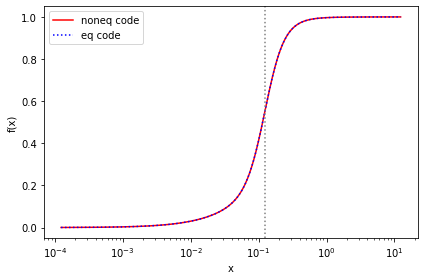

In [42]:
#finally plot both curves
instance.fill_num_den(pars,np.array([0]))


x05,xvals,f=out[-3:]

fig,ax=plt.subplots(1,1,figsize=(6,4))
ax.plot(xvals,f,color="r",label="noneq code")
ax.plot(xvals,[instance.interfaceGRF(x) for x in xvals],color="b",linestyle=":",label="eq code")
ax.axvline(x=x05,linestyle=":",color="gray")
        
ax.set_xlabel("x")
ax.set_ylabel("f(x)")
ax.set_xscale("log")
ax.legend()


#ax2=ax.twinx()
#ax2.plot(xvals2[:-1],derivative,color="r")
#ax2.axvline(x=ps[0],linestyle=":",color="r")
#ax2.axhline(y=ps[1],linestyle=":",color="r")
#ax2.axvline(x=pos,linestyle=":",color="magenta")
#ax2.axhline(y=stp,linestyle=":",color="magenta")
#ax2.set_ylabel("diff(f(x*x05))/diff(x)")
#

plt.tight_layout()

plt.show()